# Computational Phy II - Project 6

This project was concering different quantum mechanics problems, e.g. analyzing the wave equations.



# Shooting method

Shooting method was done in order to obtain the solution for eigenstates and energy eigenvalue in harmonic oscillator. Method used has been explained in the lecture notes. The code used in determining the coefficients has been shown below:

Energy eigenvalues has been found to be: [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
0.9999999999999999
1.0704962505002253
0.9999999999999998
1.0450841603342877
1.0000000000000002
0.9825915218720088


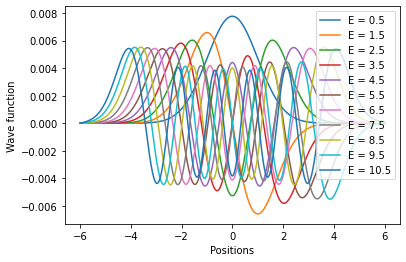

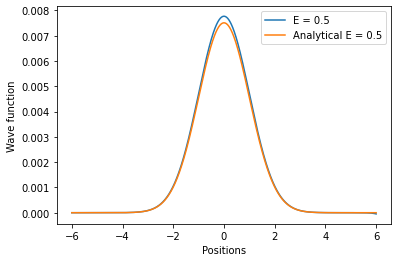

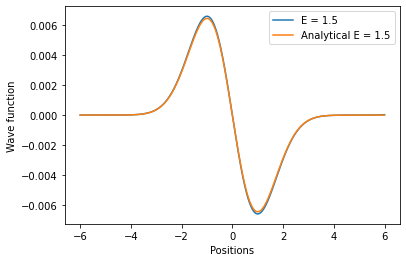

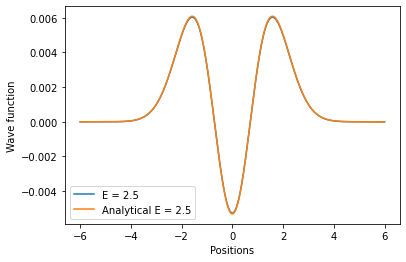

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Determine the boundary of the system 
u_max = 6 # Max cooridnate
du = 0.0001 # Discretization of space



E = 0.3 # Initial guess for Energy
E_max = 11 # Maximum energy of iterations
E_step = 0.1 # Steps of energy iterations
v_bound = 0.01 # Lower bound at last position, where it decets non-diverging wave-f
# Normalizations limits 
norm_bound_u = 1.1
norm_bound_d = 0.9



u = np.linspace(-u_max ,u_max , int(2*(u_max/du) + 1)) # Space cooridnates
v = np.zeros(len(u)) # Wave function
vi = np.zeros(len(u)) # First derivative of wave function
E_array = [] # Save energy arrays which satisfy the conditions



# Guess initial value of vi
vi[0] = 1.4e-9


# Quadratic potential
V_pot = 0.5 * u**2

# Set arrays for saving v
v_save = np.zeros((15, len(u)))


nr_sol = 0 # Number of solutions found so far
start = time.time()
while E < E_max:
    E = np.round(E,2)
    v = np.zeros(len(u)) # Wave function
    i = 0
    # Run the Euler-Cromer
    while i < (len(u) - 1):
        k = 2 * (E - V_pot[i])
        vii = - k * v[i]
        vi[i+1] = vi[i] + vii * du
        v[i+1] = v[i] + vi[i+1] * du
        i = i + 1
    # Find if the solution satisfies the boundary condition
    if v[-1] < v_bound and v[-1] > (-v_bound):
        E_array += [E]
        # Normalize the function with scaling the first derivative
        while (np.sum(v**2)) > norm_bound_u or (np.sum(v**2)) < norm_bound_d:
            i = 0
            v[0] = 0
            while i < (len(u) - 1):
                k = 2 * (E - V_pot[i]) 
                vii = - k * v[i]
                vi[i+1] = vi[i] + vii * du 
                v[i+1] = v[i] + vi[i+1] * du 
                i = i + 1  
            vi[0] = vi[0] + 0.1*vi[0] # Scale up the derivative
        v_save[nr_sol,:] = v # Save the first derivative
        nr_sol += 1 # Solution found
        E = E + E_step
    else:
        E = E + E_step
    

print("Energy eigenvalues has been found to be:", E_array) 
# Print the solutions

# Plot the solutions

fig1 = plt.figure()
plt.xlabel("Positions")
plt.ylabel("Wave function")
plt.plot(u,v_save[0,:], label = "E = 0.5")
plt.plot(u,v_save[1,:], label = "E = 1.5")
plt.plot(u,v_save[2,:], label = "E = 2.5")
plt.plot(u,v_save[3,:], label = "E = 3.5")
plt.plot(u,v_save[4,:], label = "E = 4.5")
plt.plot(u,v_save[5,:], label = "E = 5.5")
plt.plot(u,v_save[6,:], label = "E = 6.5")
plt.plot(u,v_save[7,:], label = "E = 7.5")
plt.plot(u,v_save[8,:], label = "E = 8.5")
plt.plot(u,v_save[9,:], label = "E = 9.5")
plt.plot(u,v_save[10,:], label = "E = 10.5")
plt.legend()

# Plotting solutions and comparing to analytical results
v_E1 = (np.exp(-0.5*  u**2)/(np.sqrt(np.sum(np.exp(-0.5 * u**2)**2))))
print(np.sum(v_E1**2))
print(np.sum(v_save[0,:]**2))

fig2 = plt.figure()
plt.plot(u,v_save[0,:], label = "E = 0.5")
plt.plot(u,v_E1, label = "Analytical E = 0.5")
plt.xlabel("Positions")
plt.ylabel("Wave function")
plt.legend()

v_E2 = (2* u *np.exp(-0.5*  u**2)/(np.sqrt(np.sum((2* u *np.exp(-0.5 * u**2))**2))))
print(np.sum(v_E2**2))
print(np.sum(v_save[1,:]**2))

fig3 = plt.figure()
plt.plot(u,v_save[1,:], label = "E = 1.5")
plt.plot(u,-1 * v_E2, label = "Analytical E = 1.5")
plt.xlabel("Positions")
plt.ylabel("Wave function")
plt.legend()

v_E3 = ((4 * u**2 - 2) *np.exp(-0.5*  u**2)/(np.sqrt(np.sum(((4 * u**2 - 2) *np.exp(-0.5 * u**2))**2))))
print(np.sum(v_E3**2))
print(np.sum(v_save[2,:]**2))

fig3 = plt.figure()
plt.plot(u,v_save[2,:], label = "E = 2.5")
plt.plot(u, v_E3, label = "Analytical E = 2.5")
plt.xlabel("Positions")
plt.ylabel("Wave function")
plt.legend()

First 10 energy levels have been found, and first 3 have been compared to analytical ones.

As one can see, the eigenvalues of energy represent clearly the analytically calculated ones by using the Hermite operators. The states were normalized to 1 by adjusting the first derivative of eigenstate, but there could be some error in normalization $\sim 5 \%$, so that is why there is small divergent in peaks. 

# Harmonic oscillator with quadratic term

Next simulation has been done to find the energies such that quadratic term has been added to the potential, with the adjusting $\alpha$ coefficient changing. 

Energy eigenvalues has been found to be: [2.589, 4.775, 5.901, 8.216, 9.403, 10.61]


(-0.008, 0.008)

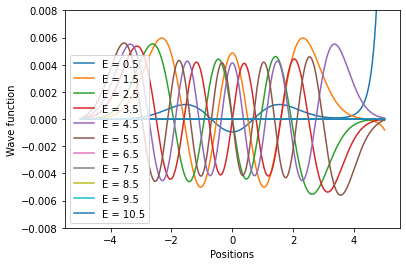

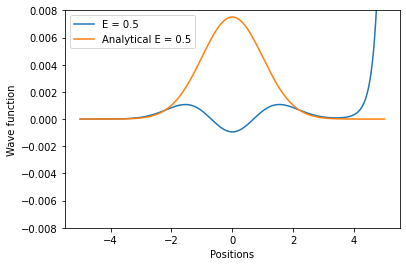

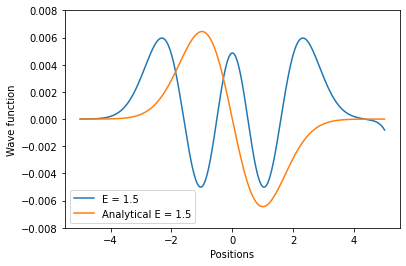

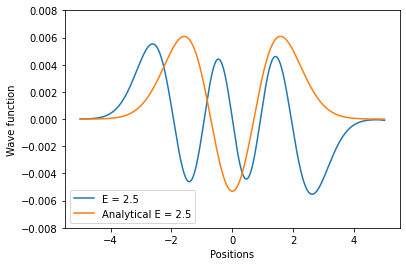

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Determine the boundary of the system 
u_max = 5 # Max cooridnate
du = 0.0001 # Discretization of space

# Coefficient alpha for of the quadratic term in harmonic osicallator
a = 0.01

E = 0.2 # Initial guess for Energy
E_max = 11 # Maximum energy of iterations
E_step = 0.001 # Steps of energy iterations
v_bound = 0.0001 # Lower bound at last position, where it decets non-diverging wave-f
# Normalizations limits 
norm_bound_u = 1.1
norm_bound_d = 0.9



u = np.linspace(-u_max ,u_max , int(2*(u_max/du) + 1)) # Space cooridnates
v = np.zeros(len(u)) # Wave function
vi = np.zeros(len(u)) # First derivative of wave function
E_array = [] # Save energy arrays which satisfy the conditions



# Guess initial value of vi
vi[0] = 1.0e-9


# Quadratic potential
V_pot = 0.5 * u**2 + a * u**4

# Set arrays for saving v
v_save = np.zeros((15, len(u)))


nr_sol = 0 # Number of solutions found so far
start = time.time()
while E < E_max:
    E = np.round(E,3)
    v = np.zeros(len(u)) # Wave function
    i = 0
    #print(E)
    # Run the Euler-Cromer
    while i < (len(u) - 1):
        k = 2 * (E - V_pot[i])
        vii = - k * v[i]
        vi[i+1] = vi[i] + vii * du
        v[i+1] = v[i] + vi[i+1] * du
        i = i + 1
    # Find if the solution satisfies the boundary condition
    if v[-1] < v_bound and v[-1] > (-v_bound):
        E_array += [E]
        # Normalize the function with scaling the first derivative
        while (np.sum(v**2)) > norm_bound_u or (np.sum(v**2)) < norm_bound_d:
            i = 0
            v[0] = 0
            while i < (len(u) - 1):
                k = 2 * (E - V_pot[i]) 
                vii = - k * v[i]
                vi[i+1] = vi[i] + vii * du 
                v[i+1] = v[i] + vi[i+1] * du 
                i = i + 1  
            vi[0] = vi[0] + 0.1*vi[0] # Scale up the derivative
        v_save[nr_sol,:] = v # Save the first derivative
        nr_sol += 1 # Solution found
        E = E + E_step
    else:
        E = E + E_step
    

print("Energy eigenvalues has been found to be:", E_array) 
# Print the solutions

# Plot the solutions

fig1 = plt.figure()
plt.xlabel("Positions")
plt.ylabel("Wave function")
plt.plot(u,v_save[0,:], label = "E = 0.5")
plt.plot(u,v_save[1,:], label = "E = 1.5")
plt.plot(u,v_save[2,:], label = "E = 2.5")
plt.plot(u,v_save[3,:], label = "E = 3.5")
plt.plot(u,v_save[4,:], label = "E = 4.5")
plt.plot(u,v_save[5,:], label = "E = 5.5")
plt.plot(u,v_save[6,:], label = "E = 6.5")
plt.plot(u,v_save[7,:], label = "E = 7.5")
plt.plot(u,v_save[8,:], label = "E = 8.5")
plt.plot(u,v_save[9,:], label = "E = 9.5")
plt.plot(u,v_save[10,:], label = "E = 10.5")
plt.legend()
plt.ylim([-0.008,0.008])

# Plotting solutions and comparing to analytical results
v_E1 = (np.exp(-0.5*  u**2)/(np.sqrt(np.sum(np.exp(-0.5 * u**2)**2))))


fig2 = plt.figure()
plt.plot(u,v_save[0,:], label = "E = 0.5")
plt.plot(u,v_E1, label = "Analytical E = 0.5")
plt.xlabel("Positions")
plt.ylabel("Wave function")
plt.legend()
plt.ylim([-0.008,0.008])

v_E2 = (2* u *np.exp(-0.5*  u**2)/(np.sqrt(np.sum((2* u *np.exp(-0.5 * u**2))**2))))


fig3 = plt.figure()
plt.plot(u,v_save[1,:], label = "E = 1.5")
plt.plot(u,-1 * v_E2, label = "Analytical E = 1.5")
plt.xlabel("Positions")
plt.ylabel("Wave function")
plt.legend()
plt.ylim([-0.008,0.008])

v_E3 = ((4 * u**2 - 2) *np.exp(-0.5*  u**2)/(np.sqrt(np.sum(((4 * u**2 - 2) *np.exp(-0.5 * u**2))**2))))


fig3 = plt.figure()
plt.plot(u,v_save[2,:], label = "E = 2.5")
plt.plot(u, v_E3, label = "Analytical E = 2.5")
plt.xlabel("Positions")
plt.ylabel("Wave function")
plt.legend()
plt.ylim([-0.008,0.008])

# Propagating packet

For the next simulation, the wavepacket of Gaussian profile has been used. Firstly, the discretization in positions, as well as in k-space has been done, by using the DFT coefficients, explained before. Then, the $\exp{-j k^2 t}$, kinetic term has been added to the momentum space, and transformed back to the position space. The variance has been calculated, which was theoretically expected to increase as $\sim t^2$, t marking the number of timesteps.  The package was left to involve in time, and observed in position space. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Normalization vs timesteps')

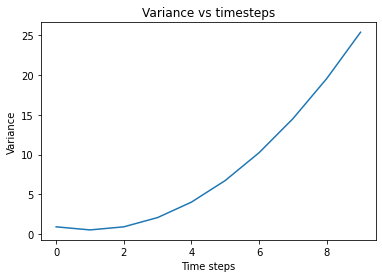

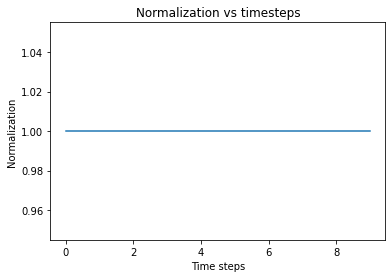

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.fft as fft

# Determine the boundary of the system 
u_max = 100 # Max cooridnate
du = 0.0001 # Discretization of space

# Determine the fournier transform k space coordinates
dk = 2 * np.pi/(2*u_max)
k_max = 2 * np.pi/(du)

# Define time evolution step
dt = 0.00001

# Define coordinates
u = np.linspace(-u_max ,u_max , int(2*(u_max/du) + 1)) # Space cooridnates
k = np.linspace(-k_max/2, k_max/2, int(2*(u_max/du) + 1))

# Define wave-packet
pack = 1/100 * (1/np.pi)**(1/4) * np.exp(-u**2 / 2)

# Find inverse tranform
g_FFT = fft.fft(pack) # FFT

# Incorporate time evolution, as well as obtain probability, and transform back
t_evo = np.exp(-1j * k**2 * dt)
pack_FFT = fft.ifft(g_FFT * t_evo)
prob = pack_FFT*np.conj(pack_FFT)
var = np.sum(u**2 * prob)


# Run the array for different time evolutions
n = 0
n_max = 10

# Create arrays to save data
var_array = []
n_array = []
norm_array = []
pack_FFT_save = np.zeros((n_max + 1, len(u)))


while n < n_max:
    n_array += [n]
    norm_array += [np.sum(prob)]
    var_array += [var]
    pack_FFT_save[n,:] = pack_FFT
    t_evo = np.exp(-1j * k**2 * dt * n)
    pack_FFT = fft.ifft(g_FFT * t_evo)
    prob = pack_FFT * np.conj(pack_FFT)
    var = np.sum(u**2 * prob)
    n = n + 1

fig1 = plt.figure()
plt.xlabel("Time steps")
plt.ylabel("Variance")
plt.plot(n_array,var_array)
plt.title("Variance vs timesteps")

fig2 = plt.figure()
plt.xlabel("Time steps")
plt.ylabel("Normalization")
plt.plot(n_array,norm_array)
plt.title("Normalization vs timesteps")

As one can see, it is confirmed that the wave-packet "spreads" as $t^2$ in the variance, confirming that the result agrees with the analytical one. 

# Adding momentum and potential barrier

The rectangular barrier has been added, and the time evolution operator in potential is incoporated in the position space, while kinetic energy  time operator has been implemented in the momentum space. The extra moving term has been added in the position space, with coefficient multiplied to the Gaussian wave-packet. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


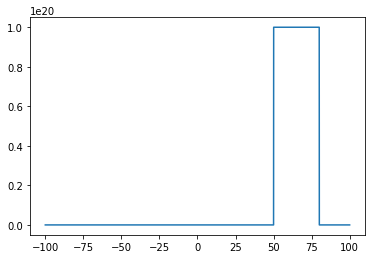

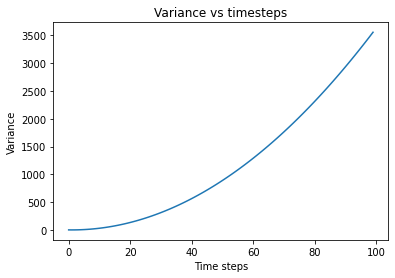

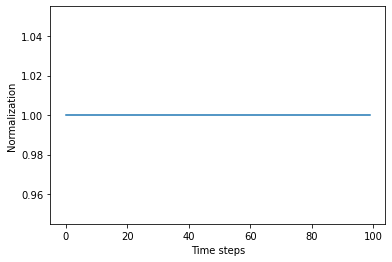

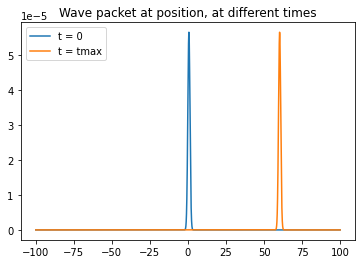

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.fft as fft

# Determine the boundary of the system 
u_max = 100 # Max cooridnate
du = 0.0001 # Discretization of space

# Determine the fournier transform k space coordinates
dk = 2 * np.pi/(2*u_max)
k_max = 2 * np.pi/(du)

# Define time evolution step
dt = 0.00001


# Define coordinates
u = np.linspace(-u_max ,u_max , int(2*(u_max/du) + 1)) # Space cooridnates
k = np.linspace(-k_max/2, k_max/2, int(2*(u_max/du) + 1))

# Initialize the momentum 
k0 = 1000
t_k0 = np.exp(-1j * k0 * u)

# Define the potential 
V0 = 1e20
u_p = 50 # Placement of potential start
u_p_end = 80 # Placement of potential end

# Place the potential  array
V_array = np.zeros(len(u))
u_pot = u_p
while u_pot <= u_p_end :
    V_array[int(u_max/du + u_pot/du)] = V0
    u_pot = u_pot + du

plt.plot(u, V_array)

# Potential operator
V_op = np.exp(-1j * V_array * dt)


# Define wave-packet with momentum kick 
pack = 1/100 * (1/np.pi)**(1/4) * np.exp(-u**2 / 2) * t_k0


# Apply potential operator
pack_V_op = pack * V_op


# Find inverse tranform
g_FFT = fft.fft(pack_V_op) # FFT

# Incorporate time evolution, as well as obtain probability, and transform back
t_evo = np.exp(-1j * k**2 * dt)
pack_FFT = fft.ifft(g_FFT * t_evo)
prob = pack_FFT * np.conj(pack_FFT) # Find normalization
var = np.sum(u**2 * prob)


# Run the array for different time evolutions
n = 0
n_max = 100

# Create arrays to save data
var_array = []
n_array = []
norm_array = []
pack_FFT_save = np.zeros((n_max + 1, len(u)))

# Complete the iterations
while n < n_max:
    n_array += [n]
    norm_array += [np.sum(prob)]
    var_array += [var]
    t_evo = np.exp(-1j * k**2 * dt * n) # Add kineteic time evolution
    pack_FFT = fft.ifft(g_FFT * t_evo)
    prob = pack_FFT * np.conj(pack_FFT)
    pack_FFT_save[n,:] = prob
    var = np.sum(u**2 * prob)
    n = n + 1

fig1 = plt.figure()
plt.xlabel("Time steps")
plt.ylabel("Variance")
plt.plot(n_array,var_array)
plt.title("Variance vs timesteps")

fig2 = plt.figure()
plt.xlabel("Time steps")
plt.ylabel("Normalization")
plt.plot(n_array,norm_array)

fig3 = plt.figure()
plt.title("Wave packet at position, at different times")
plt.plot(u, pack_FFT_save[1,:], label = "t = 0")
plt.plot(u, prob, label = "t = tmax")
plt.legend()

It has been seen that the wave-packet propagates through the space, with different times. However, the potential was not seen, for some reason. 